### Now switch to Lugano tutorial and do exercise 1, the first metadynamiscs simulation, starting from structure A, using bias factor 10.
- The full reference is in the documentation
- Make sure the command is metad: METAD ... and the rest is on separate lines after. Careful if you're using a non-standard text editor.
    Backup, put all on one line and remove ... if you still have error
- In addition to the inputs in the tutorial, try adding GRID_WFILE=__FILENAME__.grid.dat GRID_WSTRIDE=10000 to write out a grid file.
- The grid file has the bias. Plot the negative of the energy column in the grid file, does it look like the FES? Is it slightly different? Perhaps scaled by a constant that you can figure out?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
time_colvar, phi_colvar, psi_colvar, MetadBias_colvar = np.loadtxt("/home/qo210/comp-lab-class/comp-lab-class-2023-new/Week6/Inputs/Q3/adp_colvar.txt", skiprows=5, unpack=True)
time_hills, phi_hills, sigma_phi_hills, height_hills, biasf_hills = np.loadtxt("/home/qo210/comp-lab-class/comp-lab-class-2023-new/Week6/Inputs/Q3/adp.hills.txt", skiprows=5, unpack=True)
phi_grid, MetadBias_grid, derivatives_phi_grid = np.loadtxt("/home/qo210/comp-lab-class/comp-lab-class-2023-new/Week6/Inputs/Q3/adp.grid.dat", skiprows=5, unpack=True)

# check data we are going to plot
print('time_colvar:', time_colvar.shape)
print('phi_colvar:', phi_colvar.shape)

print('time_hills:', time_hills.shape)
print('height_hills:', height_hills.shape)

print('phi_grid:', phi_grid.shape)
print('MetadBias_grid:', MetadBias_grid.shape)
print('derivatives_phi_grid:', derivatives_phi_grid.shape)

time_colvar: (500001,)
phi_colvar: (500001,)
time_hills: (10000,)
height_hills: (10000,)
phi_grid: (58,)
MetadBias_grid: (58,)
derivatives_phi_grid: (58,)


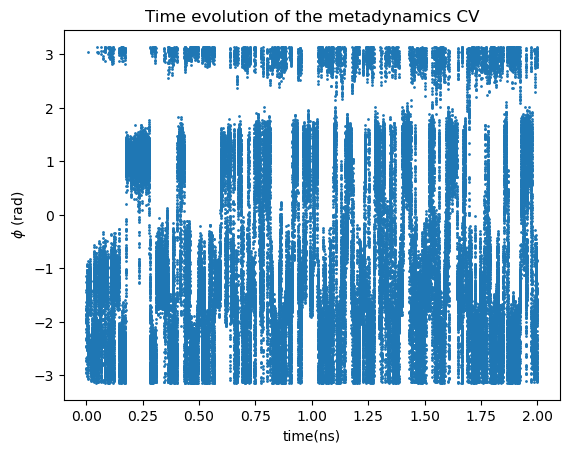

In [16]:
# visualize the behavior of the CV during the simulation, as reported in the COLVAR file
plt.scatter(time_colvar[:100000]/1000, phi_colvar[:100000],alpha=1, s=1)

# set all labels
plt.ylabel(r'$\phi$ (rad)')
plt.xlabel('time(ns)')
# set titles
plt.title("Time evolution of the metadynamics CV")
# save figure
plt.savefig("../Figures/Q3_ADP_CV_TimeEvolution.png",format="png")
plt.show()

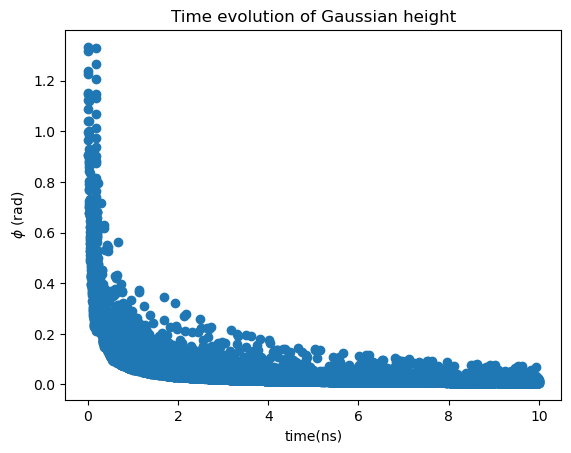

In [17]:
# use the HILLS file to visualize the decrease of the Gaussian height during the simulation
# plot Gaussian height vs time
plt.scatter(time_hills/1000, height_hills)

# set all labels
plt.ylabel(r'$\phi$ (rad)')
plt.xlabel('time(ns)')
# set titles
plt.title("Time evolution of Gaussian height")
# save figure
plt.savefig("../Figures/Q3_Time evolution of Gaussian height.png",format="png")
plt.show()

### The grid file has the bias. Plot the negative of the energy column in the grid file, does it look like the FES? Is it slightly different? Perhaps scaled by a constant that you can figure out?

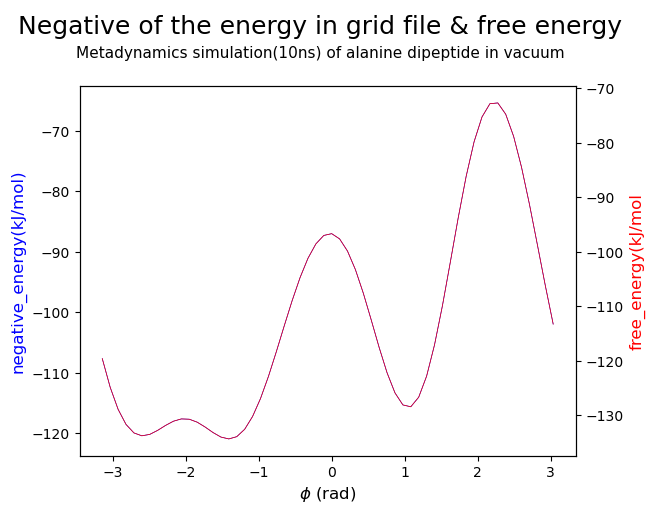

In [22]:
biasfactor = 10
free_energy = MetadBias_grid * (biasfactor/(1-biasfactor))

# plot negative of the energy in grid file & free energy
free_energy_plot,energy_in_grid = plt.subplots()                                       
energy_in_grid.plot(phi_grid, - MetadBias_grid, color=col1,linewidth=0.5)                     
energy_in_grid.set_xlabel(r'$\phi$ (rad)')                                  
energy_in_grid.set_ylabel('negative_energy(kJ/mol)')         
#Kinetic_plot.show
free_energy_plot = energy_in_grid.twinx()                                               
free_energy_plot.plot(phi_grid, free_energy, color=col2,linewidth=0.5)                       
free_energy_plot.set_ylabel('free_energy(kJ/mol', color=col2, fontsize=12)        

# set all titles
plt.text(x=0.5, y=1, s="Negative of the energy in grid file & free energy", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.95, s= "Metadynamics simulation(10ns) of alanine dipeptide in vacuum", fontsize=11, ha="center", transform=fig.transFigure)

# save figure
plt.savefig("../Figures/Q3_Negative of the Energy in grid file and free energy.png",format="png")
plt.show()